Credits (Udemy Course) - https://www.udemy.com/course/complete-tensorflow-2-and-keras-deep-learning-bootcamp/

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [3]:
df = pd.read_csv('DATA/kc_house_data.csv')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


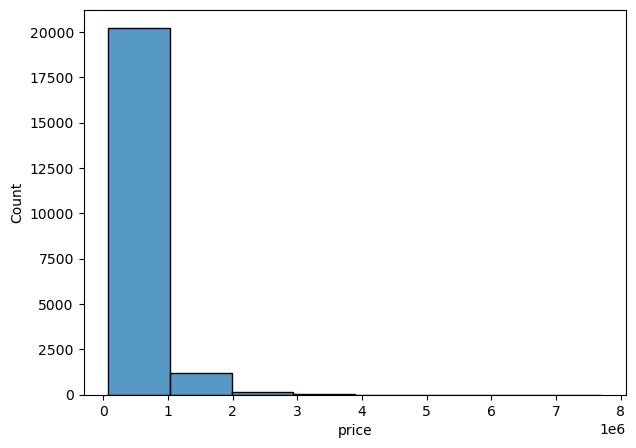

In [17]:
plt.figure(figsize=(7,5))
sns.histplot(x = 'price', data = df, bins = 8);

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

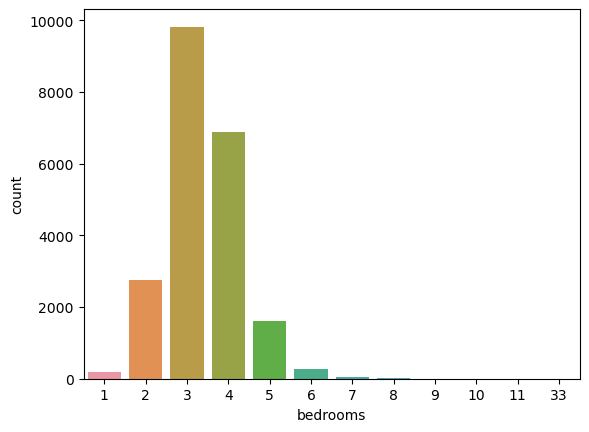

In [19]:
sns.countplot(x = 'bedrooms', data = df)

In [21]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

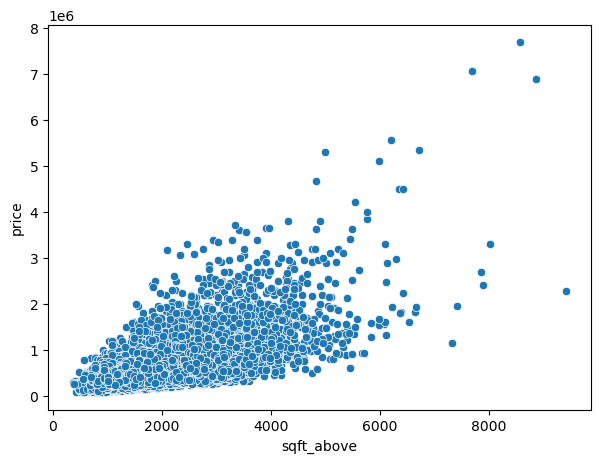

In [23]:
plt.figure(figsize=(7,5))
sns.scatterplot(x = 'sqft_above', y = 'price', data = df);

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

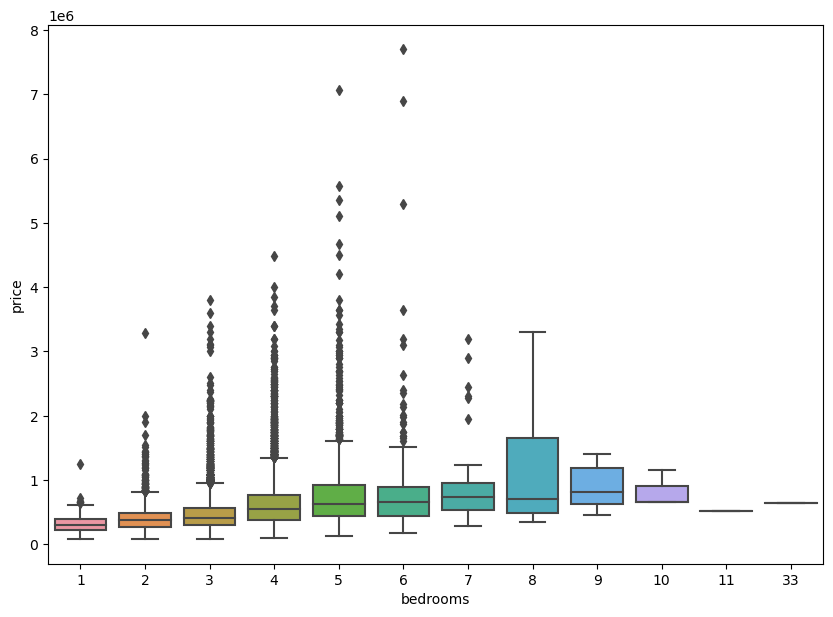

In [26]:
plt.figure(figsize=(10,7))
sns.boxplot(x = 'bedrooms', y = 'price', data = df)

<AxesSubplot:xlabel='waterfront', ylabel='price'>

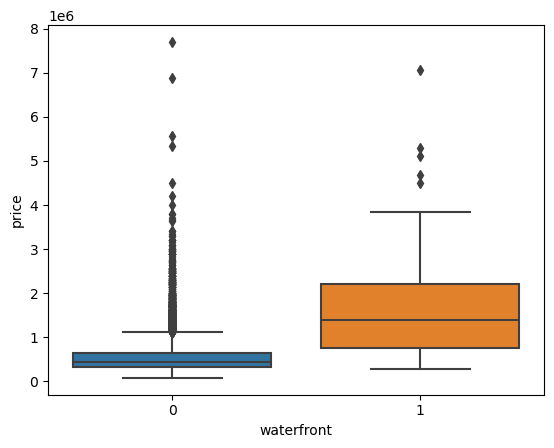

In [27]:
sns.boxplot(x = 'waterfront', y = 'price', data = df)

In [28]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [30]:
df = df.drop('id', axis = 1)

In [31]:
df['date'] = pd.to_datetime(df['date'])

In [35]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [38]:
monthwise_price = df.groupby('month').mean()['price']
monthwise_price

month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

<AxesSubplot:xlabel='month'>

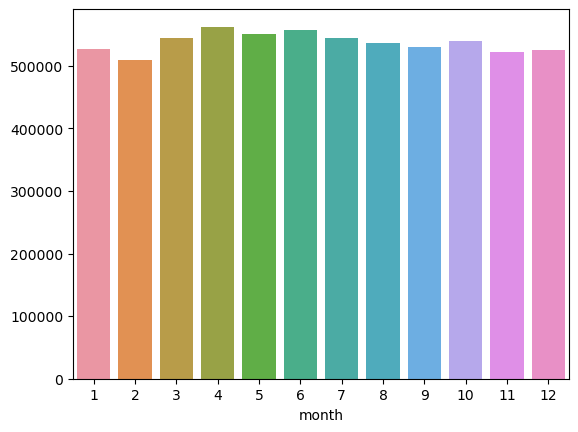

In [39]:
sns.barplot(x = monthwise_price.index, y = monthwise_price.values)

In [42]:
df = df.drop('date', axis = 1)
df = df.drop('zipcode', axis = 1)

In [43]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [44]:
X = df.drop('price', axis = 1).values
y = df['price'].values

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.3, random_state=101)

In [47]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
X_train.shape

(15117, 19)

In [49]:
model = Sequential()

model.add(Dense(units = 19 ,activation='relu'))
model.add(Dense(units = 19 ,activation='relu'))
model.add(Dense(units = 19 ,activation='relu'))
model.add(Dense(units = 19 ,activation='relu'))

model.add(Dense(units = 1))

model.compile(optimizer='adam', loss = 'mse')

In [50]:
model.fit(x = X_train, y = y_train, 
          epochs = 400, 
          batch_size = 128,
          validation_data=(X_test, y_test))

Epoch 1/400
119/119 [==============================] - 7s 23ms/step - loss: 430237057024.0000 - val_loss: 418906537984.0000
Epoch 2/400
119/119 [==============================] - 1s 9ms/step - loss: 429243334656.0000 - val_loss: 415555944448.0000
Epoch 3/400
119/119 [==============================] - 2s 15ms/step - loss: 416241319936.0000 - val_loss: 385970044928.0000
Epoch 4/400
119/119 [==============================] - 2s 13ms/step - loss: 352574472192.0000 - val_loss: 281360990208.0000
Epoch 5/400
119/119 [==============================] - 2s 14ms/step - loss: 213789032448.0000 - val_loss: 135967383552.0000
Epoch 6/400
119/119 [==============================] - 1s 10ms/step - loss: 111946678272.0000 - val_loss: 95927287808.0000
Epoch 7/400
119/119 [==============================] - 1s 9ms/step - loss: 98219163648.0000 - val_loss: 94165540864.0000
Epoch 8/400
119/119 [==============================] - 1s 10ms/step - loss: 96628867072.0000 - val_loss: 92742098944.0000
Epoch 9/400
119

Epoch 68/400
119/119 [==============================] - 1s 7ms/step - loss: 37044768768.0000 - val_loss: 35724513280.0000
Epoch 69/400
119/119 [==============================] - 1s 7ms/step - loss: 36889571328.0000 - val_loss: 35616030720.0000
Epoch 70/400
119/119 [==============================] - 1s 7ms/step - loss: 36791017472.0000 - val_loss: 35496308736.0000
Epoch 71/400
119/119 [==============================] - 1s 7ms/step - loss: 36671344640.0000 - val_loss: 35402412032.0000
Epoch 72/400
119/119 [==============================] - 1s 6ms/step - loss: 36595953664.0000 - val_loss: 35327991808.0000
Epoch 73/400
119/119 [==============================] - 1s 6ms/step - loss: 36462747648.0000 - val_loss: 35222122496.0000
Epoch 74/400
119/119 [==============================] - 1s 7ms/step - loss: 36400762880.0000 - val_loss: 35133845504.0000
Epoch 75/400
119/119 [==============================] - 1s 6ms/step - loss: 36297928704.0000 - val_loss: 35061190656.0000
Epoch 76/400
119/119 [==

Epoch 135/400
119/119 [==============================] - 1s 7ms/step - loss: 33363621888.0000 - val_loss: 32010563584.0000
Epoch 136/400
119/119 [==============================] - 1s 6ms/step - loss: 33396133888.0000 - val_loss: 31936030720.0000
Epoch 137/400
119/119 [==============================] - 1s 6ms/step - loss: 33365368832.0000 - val_loss: 31908341760.0000
Epoch 138/400
119/119 [==============================] - 1s 7ms/step - loss: 33278412800.0000 - val_loss: 31870652416.0000
Epoch 139/400
119/119 [==============================] - 1s 6ms/step - loss: 33271508992.0000 - val_loss: 31868094464.0000
Epoch 140/400
119/119 [==============================] - 1s 6ms/step - loss: 33223208960.0000 - val_loss: 31807111168.0000
Epoch 141/400
119/119 [==============================] - 1s 7ms/step - loss: 33233532928.0000 - val_loss: 31769247744.0000
Epoch 142/400
119/119 [==============================] - 1s 7ms/step - loss: 33195177984.0000 - val_loss: 31761752064.0000
Epoch 143/400
11

119/119 [==============================] - 1s 6ms/step - loss: 31992322048.0000 - val_loss: 30093680640.0000
Epoch 202/400
119/119 [==============================] - 1s 6ms/step - loss: 31911297024.0000 - val_loss: 30078404608.0000
Epoch 203/400
119/119 [==============================] - 1s 6ms/step - loss: 31923918848.0000 - val_loss: 30036152320.0000
Epoch 204/400
119/119 [==============================] - 1s 6ms/step - loss: 31863148544.0000 - val_loss: 30022520832.0000
Epoch 205/400
119/119 [==============================] - 1s 6ms/step - loss: 31843758080.0000 - val_loss: 30180937728.0000
Epoch 206/400
119/119 [==============================] - 1s 6ms/step - loss: 31893141504.0000 - val_loss: 29984509952.0000
Epoch 207/400
119/119 [==============================] - 1s 6ms/step - loss: 31828574208.0000 - val_loss: 29962264576.0000
Epoch 208/400
119/119 [==============================] - 1s 6ms/step - loss: 31804377088.0000 - val_loss: 30061064192.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 1s 6ms/step - loss: 30920069120.0000 - val_loss: 28892827648.0000
Epoch 268/400
119/119 [==============================] - 1s 6ms/step - loss: 30953003008.0000 - val_loss: 28891316224.0000
Epoch 269/400
119/119 [==============================] - 1s 7ms/step - loss: 30925377536.0000 - val_loss: 28903966720.0000
Epoch 270/400
119/119 [==============================] - 1s 6ms/step - loss: 30927775744.0000 - val_loss: 28866957312.0000
Epoch 271/400
119/119 [==============================] - 1s 6ms/step - loss: 30912681984.0000 - val_loss: 28835856384.0000
Epoch 272/400
119/119 [==============================] - 1s 6ms/step - loss: 30891476992.0000 - val_loss: 28860211200.0000
Epoch 273/400
119/119 [==============================] - 1s 6ms/step - loss: 30911508480.0000 - val_loss: 28819875840.0000
Epoch 274/400
119/119 [==============================] - 1s 6ms/step - loss: 30991210496.0000 - val_loss: 28793315328.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 1s 7ms/step - loss: 30175283200.0000 - val_loss: 27954595840.0000
Epoch 334/400
119/119 [==============================] - 1s 7ms/step - loss: 30145007616.0000 - val_loss: 27941120000.0000
Epoch 335/400
119/119 [==============================] - 1s 7ms/step - loss: 30146793472.0000 - val_loss: 27908253696.0000
Epoch 336/400
119/119 [==============================] - 1s 7ms/step - loss: 30138519552.0000 - val_loss: 27875602432.0000
Epoch 337/400
119/119 [==============================] - 1s 7ms/step - loss: 30165807104.0000 - val_loss: 27866269696.0000
Epoch 338/400
119/119 [==============================] - 1s 7ms/step - loss: 30106501120.0000 - val_loss: 27858112512.0000
Epoch 339/400
119/119 [==============================] - 1s 7ms/step - loss: 30103924736.0000 - val_loss: 27839418368.0000
Epoch 340/400
119/119 [==============================] - 1s 7ms/step - loss: 30087190528.0000 - val_loss: 27828498432.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 1s 7ms/step - loss: 29433227264.0000 - val_loss: 27087816704.0000
Epoch 400/400
119/119 [==============================] - 1s 7ms/step - loss: 29440092160.0000 - val_loss: 27020478464.0000


In [56]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,val_loss
0,4.302371e+11,4.189065e+11
1,4.292433e+11,4.155559e+11
2,4.162413e+11,3.859700e+11
3,3.525745e+11,2.813610e+11
4,2.137890e+11,1.359674e+11


<AxesSubplot:>

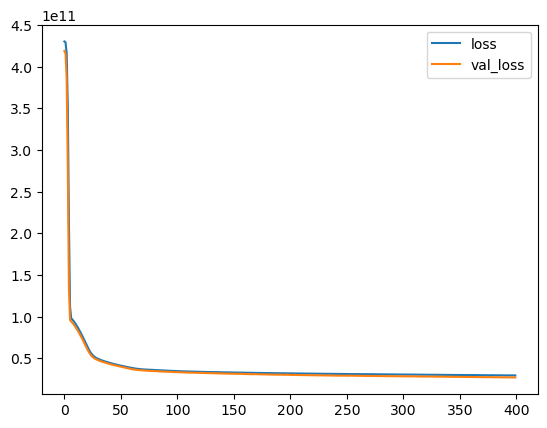

In [54]:
losses.plot()

In [59]:
predictions = model.predict(X_test)

203/203 [==============================] - 2s 7ms/step


In [60]:
mean_squared_error(y_test, predictions)

27020479067.538235

In [61]:
rmse = mean_squared_error(y_test, predictions) ** 0.5
rmse 

164379.07125768243

In [62]:
mean_absolute_error(y_test, predictions)

101515.03299816744

In [63]:
df['price'].mean()

540296.5735055795

In [64]:
explained_variance_score(y_test, predictions)

0.7964153122804534

In [67]:
model = Sequential()

model.add(Dense(units = 19 ,activation='relu'))
model.add(Dense(units = 20 ,activation='relu'))
model.add(Dense(units = 20 ,activation='relu'))
model.add(Dense(units = 20 ,activation='relu'))
model.add(Dense(units = 20 ,activation='relu'))
model.add(Dense(units = 20 ,activation='relu'))
model.add(Dense(units = 20 ,activation='relu'))

model.add(Dense(units = 1))

model.compile(optimizer='adam', loss = 'mse')

In [68]:
model.fit(x = X_train, y = y_train, 
          epochs = 600, 
          batch_size = 128,
          validation_data=(X_test, y_test))

Epoch 1/600
119/119 [==============================] - 4s 12ms/step - loss: 430179909632.0000 - val_loss: 418284011520.0000
Epoch 2/600
119/119 [==============================] - 1s 7ms/step - loss: 361834446848.0000 - val_loss: 132942512128.0000
Epoch 3/600
119/119 [==============================] - 1s 7ms/step - loss: 100398817280.0000 - val_loss: 92316901376.0000
Epoch 4/600
119/119 [==============================] - 3s 26ms/step - loss: 92816867328.0000 - val_loss: 87631568896.0000
Epoch 5/600
119/119 [==============================] - 2s 21ms/step - loss: 87719624704.0000 - val_loss: 82442461184.0000
Epoch 6/600
119/119 [==============================] - 2s 19ms/step - loss: 82199101440.0000 - val_loss: 76919185408.0000
Epoch 7/600
119/119 [==============================] - 2s 14ms/step - loss: 76537716736.0000 - val_loss: 71183556608.0000
Epoch 8/600
119/119 [==============================] - 2s 13ms/step - loss: 70241615872.0000 - val_loss: 65482588160.0000
Epoch 9/600
119/119 [

Epoch 68/600
119/119 [==============================] - 1s 8ms/step - loss: 31457155072.0000 - val_loss: 29560543232.0000
Epoch 69/600
119/119 [==============================] - 1s 11ms/step - loss: 31435423744.0000 - val_loss: 29621092352.0000
Epoch 70/600
119/119 [==============================] - 2s 18ms/step - loss: 31481720832.0000 - val_loss: 30523662336.0000
Epoch 71/600
119/119 [==============================] - 1s 11ms/step - loss: 31424032768.0000 - val_loss: 29407893504.0000
Epoch 72/600
119/119 [==============================] - 1s 13ms/step - loss: 31264700416.0000 - val_loss: 29421035520.0000
Epoch 73/600
119/119 [==============================] - 1s 10ms/step - loss: 31220797440.0000 - val_loss: 29221079040.0000
Epoch 74/600
119/119 [==============================] - 1s 11ms/step - loss: 31205881856.0000 - val_loss: 29320288256.0000
Epoch 75/600
119/119 [==============================] - 1s 11ms/step - loss: 31215443968.0000 - val_loss: 29169612800.0000
Epoch 76/600
119/

119/119 [==============================] - 1s 12ms/step - loss: 29079967744.0000 - val_loss: 26529835008.0000
Epoch 135/600
119/119 [==============================] - 1s 12ms/step - loss: 29078519808.0000 - val_loss: 26629683200.0000
Epoch 136/600
119/119 [==============================] - 1s 9ms/step - loss: 29062299648.0000 - val_loss: 26494750720.0000
Epoch 137/600
119/119 [==============================] - 1s 8ms/step - loss: 28898834432.0000 - val_loss: 26555764736.0000
Epoch 138/600
119/119 [==============================] - 1s 9ms/step - loss: 28868028416.0000 - val_loss: 26495434752.0000
Epoch 139/600
119/119 [==============================] - 1s 10ms/step - loss: 28831481856.0000 - val_loss: 26564163584.0000
Epoch 140/600
119/119 [==============================] - 1s 11ms/step - loss: 28893073408.0000 - val_loss: 26413047808.0000
Epoch 141/600
119/119 [==============================] - 1s 10ms/step - loss: 28806946816.0000 - val_loss: 26340698112.0000
Epoch 142/600
119/119 [==

119/119 [==============================] - 1s 7ms/step - loss: 26876545024.0000 - val_loss: 24421488640.0000
Epoch 239/600
119/119 [==============================] - 1s 7ms/step - loss: 26871627776.0000 - val_loss: 24628365312.0000
Epoch 240/600
119/119 [==============================] - 1s 8ms/step - loss: 26747959296.0000 - val_loss: 24357804032.0000
Epoch 241/600
119/119 [==============================] - 1s 8ms/step - loss: 26903699456.0000 - val_loss: 24220948480.0000
Epoch 242/600
119/119 [==============================] - 1s 7ms/step - loss: 26752030720.0000 - val_loss: 24357568512.0000
Epoch 243/600
119/119 [==============================] - 1s 7ms/step - loss: 26829608960.0000 - val_loss: 24340172800.0000
Epoch 244/600
119/119 [==============================] - 1s 7ms/step - loss: 26883526656.0000 - val_loss: 24539850752.0000
Epoch 245/600
119/119 [==============================] - 1s 7ms/step - loss: 26867699712.0000 - val_loss: 24349128704.0000
Epoch 246/600
119/119 [=======

119/119 [==============================] - 1s 7ms/step - loss: 25944956928.0000 - val_loss: 24161300480.0000
Epoch 305/600
119/119 [==============================] - 1s 7ms/step - loss: 26127695872.0000 - val_loss: 23874486272.0000
Epoch 306/600
119/119 [==============================] - 1s 7ms/step - loss: 26109638656.0000 - val_loss: 24055158784.0000
Epoch 307/600
119/119 [==============================] - 1s 7ms/step - loss: 26049619968.0000 - val_loss: 23988279296.0000
Epoch 308/600
119/119 [==============================] - 1s 7ms/step - loss: 26174900224.0000 - val_loss: 23884064768.0000
Epoch 309/600
119/119 [==============================] - 1s 7ms/step - loss: 26017572864.0000 - val_loss: 23885991936.0000
Epoch 310/600
119/119 [==============================] - 1s 7ms/step - loss: 26210973696.0000 - val_loss: 23823089664.0000
Epoch 311/600
119/119 [==============================] - 1s 7ms/step - loss: 26059534336.0000 - val_loss: 24125274112.0000
Epoch 312/600
119/119 [=======

119/119 [==============================] - 1s 7ms/step - loss: 25320718336.0000 - val_loss: 24020111360.0000
Epoch 371/600
119/119 [==============================] - 1s 7ms/step - loss: 25462374400.0000 - val_loss: 23596771328.0000
Epoch 372/600
119/119 [==============================] - 1s 7ms/step - loss: 25298126848.0000 - val_loss: 23376689152.0000
Epoch 373/600
119/119 [==============================] - 1s 7ms/step - loss: 25189640192.0000 - val_loss: 23482832896.0000
Epoch 374/600
119/119 [==============================] - 1s 7ms/step - loss: 25353871360.0000 - val_loss: 23540660224.0000
Epoch 375/600
119/119 [==============================] - 1s 7ms/step - loss: 25351096320.0000 - val_loss: 23462174720.0000
Epoch 376/600
119/119 [==============================] - 1s 7ms/step - loss: 25177280512.0000 - val_loss: 23617990656.0000
Epoch 377/600
119/119 [==============================] - 1s 7ms/step - loss: 25132527616.0000 - val_loss: 23333470208.0000
Epoch 378/600
119/119 [=======

119/119 [==============================] - 1s 7ms/step - loss: 21850597376.0000 - val_loss: 21107681280.0000
Epoch 437/600
119/119 [==============================] - 1s 7ms/step - loss: 21837813760.0000 - val_loss: 21063376896.0000
Epoch 438/600
119/119 [==============================] - 1s 7ms/step - loss: 21808044032.0000 - val_loss: 21024698368.0000
Epoch 439/600
119/119 [==============================] - 1s 7ms/step - loss: 21650411520.0000 - val_loss: 20966785024.0000
Epoch 440/600
119/119 [==============================] - 1s 7ms/step - loss: 21677174784.0000 - val_loss: 20901136384.0000
Epoch 441/600
119/119 [==============================] - 1s 7ms/step - loss: 21583699968.0000 - val_loss: 20954404864.0000
Epoch 442/600
119/119 [==============================] - 1s 7ms/step - loss: 21516941312.0000 - val_loss: 21056839680.0000
Epoch 443/600
119/119 [==============================] - 1s 8ms/step - loss: 21478723584.0000 - val_loss: 20743706624.0000
Epoch 444/600
119/119 [=======

119/119 [==============================] - 1s 7ms/step - loss: 18166310912.0000 - val_loss: 18696329216.0000
Epoch 503/600
119/119 [==============================] - 1s 8ms/step - loss: 18249672704.0000 - val_loss: 18706034688.0000
Epoch 504/600
119/119 [==============================] - 1s 7ms/step - loss: 18050322432.0000 - val_loss: 19130290176.0000
Epoch 505/600
119/119 [==============================] - 1s 7ms/step - loss: 18149879808.0000 - val_loss: 18649231360.0000
Epoch 506/600
119/119 [==============================] - 1s 7ms/step - loss: 18073626624.0000 - val_loss: 18698776576.0000
Epoch 507/600
119/119 [==============================] - 1s 7ms/step - loss: 18191661056.0000 - val_loss: 18800695296.0000
Epoch 508/600
119/119 [==============================] - 1s 8ms/step - loss: 18023706624.0000 - val_loss: 19140397056.0000
Epoch 509/600
119/119 [==============================] - 1s 8ms/step - loss: 18199519232.0000 - val_loss: 18813988864.0000
Epoch 510/600
119/119 [=======

119/119 [==============================] - 1s 7ms/step - loss: 16378471424.0000 - val_loss: 18238302208.0000
Epoch 569/600
119/119 [==============================] - 1s 7ms/step - loss: 16394985472.0000 - val_loss: 18199318528.0000
Epoch 570/600
119/119 [==============================] - 1s 7ms/step - loss: 16264568832.0000 - val_loss: 17956397056.0000
Epoch 571/600
119/119 [==============================] - 1s 7ms/step - loss: 16259963904.0000 - val_loss: 17980041216.0000
Epoch 572/600
119/119 [==============================] - 1s 7ms/step - loss: 16374863872.0000 - val_loss: 18148759552.0000
Epoch 573/600
119/119 [==============================] - 1s 7ms/step - loss: 16186645504.0000 - val_loss: 17976741888.0000
Epoch 574/600
119/119 [==============================] - 1s 7ms/step - loss: 16266510336.0000 - val_loss: 18038415360.0000
Epoch 575/600
119/119 [==============================] - 1s 7ms/step - loss: 16177326080.0000 - val_loss: 17896466432.0000
Epoch 576/600
119/119 [=======

In [69]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,val_loss
0,4.301799e+11,4.182840e+11
1,3.618344e+11,1.329425e+11
2,1.003988e+11,9.231690e+10
3,9.281687e+10,8.763157e+10
4,8.771962e+10,8.244246e+10


<AxesSubplot:>

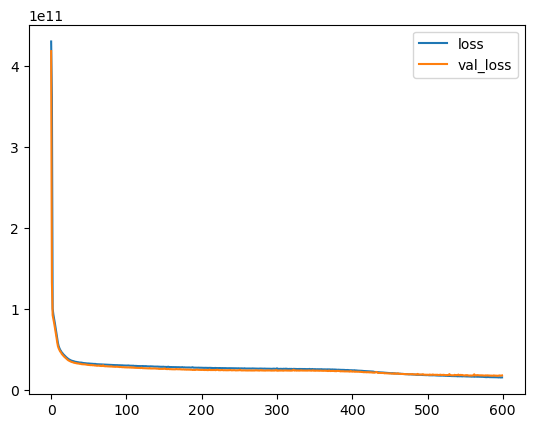

In [70]:
losses.plot()

In [71]:
mean_squared_error(y_test, predictions)

27020479067.538235

In [72]:
rmse = mean_squared_error(y_test, predictions) ** 0.5
rmse 

164379.07125768243

In [73]:
mean_absolute_error(y_test, predictions)

101515.03299816744

In [74]:
explained_variance_score(y_test, predictions)

0.7964153122804534